In [14]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist

# 1. Lade den Datensatz

In [ ]:
# dataset = load_dataset('amazon_reviews_multi', language='de')
# Amazon Datensatz oder 10K Nachrichtenartikel
dataset = load_dataset('gnad10')

Found cached dataset gnad10 (C:/Users/tomas/.cache/huggingface/datasets/gnad10/default/1.1.0/3a8445be65795ad88270af4d797034c3d99f70f8352ca658c586faf1cf960881)


  0%|          | 0/2 [00:00<?, ?it/s]

## Labels

* 0 - Web
* 1 - Panorama
* 2 - International
* 3 - Wirtschaft
* 4 - Sport
* 5 - Inland
* 6 - Etat
* 7 - Wissenschaft
* 8 - Kultur

# 2. Verbinde die Datensätze

In [16]:
df_train = pd.DataFrame(dataset['train'])
df_test = pd.DataFrame(dataset['test'])
df = pd.concat([df_train, df_test], ignore_index=True)

# 3. Datenexploration

In [17]:
df.shape

(10273, 2)

* 2 Spalten
* 10273 Zeilen

## 3.1 Label Verteilung

In [18]:
df['category'] = df['label'].replace({
    0: 'Web',
    1: 'Panorama',
    2: 'International',
    3: 'Wirtschaft',
    4: 'Sport',
    5: 'Inland',
    6: 'Etat',
    7: 'Wissenschaft',
    8: 'Kultur'
})

In [19]:
label_counts = df['category'].value_counts(ascending=False)
sorted_labels = label_counts.index.tolist()

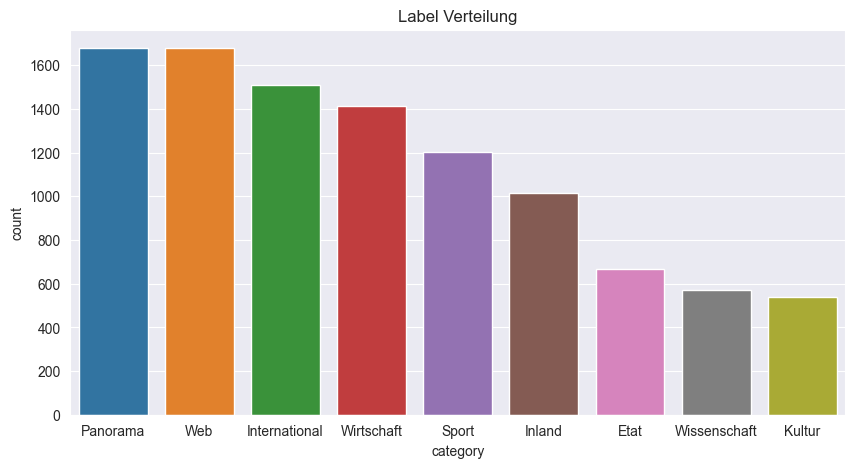

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(x='category', data=df, order=sorted_labels)
plt.title('Label Verteilung')
plt.show()

## 3.2 Verteilung der Textlänge

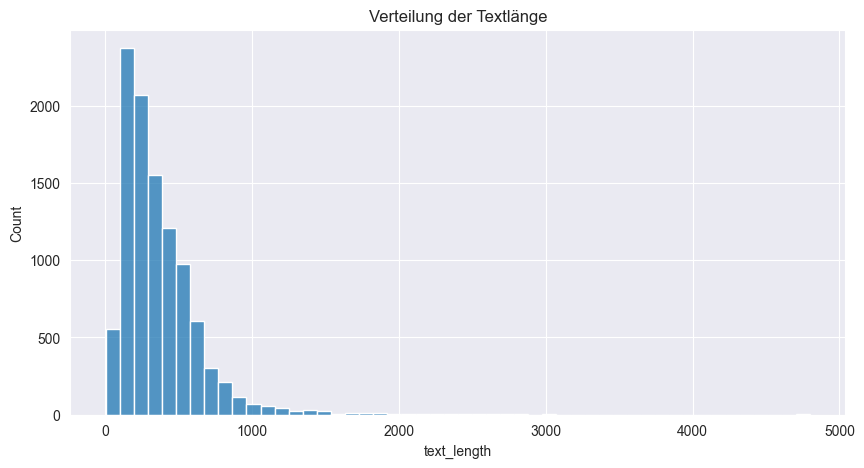

In [21]:
df['text_length'] = df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='text_length', bins=50)
plt.title('Verteilung der Textlänge')
plt.show()

## 3.3 20 Wörter, die am häufigsten vorkommen

In [22]:
nltk.download('stopwords')
stop_words = set(stopwords.words('german'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
all_text = df['text'].str.cat()
tokens = nltk.word_tokenize(all_text.lower())
words = [word for word in tokens if ((word not in stop_words) and (word.isalpha()))]
word_freq = FreqDist(words)
top_words = word_freq.most_common(20)

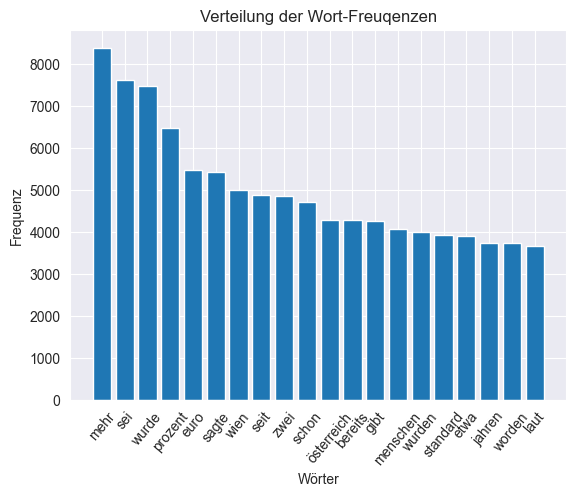

In [24]:
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xticks(rotation=50)
plt.xlabel('Wörter')
plt.ylabel('Frequenz')
plt.title('Verteilung der Wort-Freuqenzen')
plt.show()